In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
PATH = 'wine-clustering.csv'
dataset = pd.read_csv(PATH)
dataset = dataset[:100]

<Axes: >

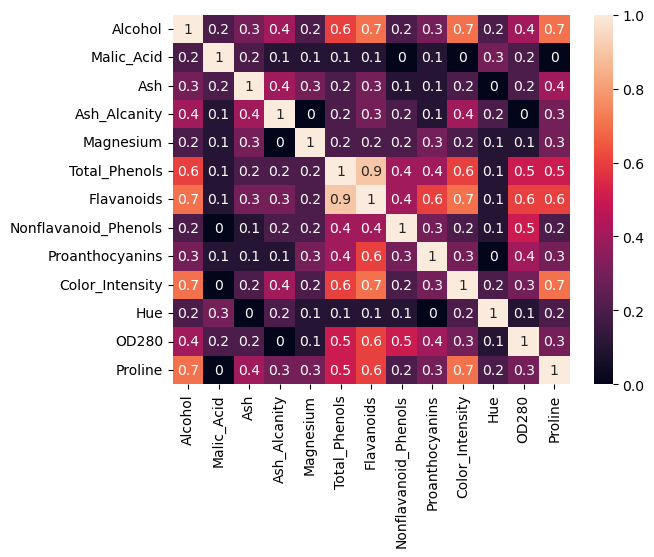

In [3]:
sns.heatmap(
    round(
        abs(dataset.corr()),
        1,
    ),
    annot=True,
)

D:\Conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. Y

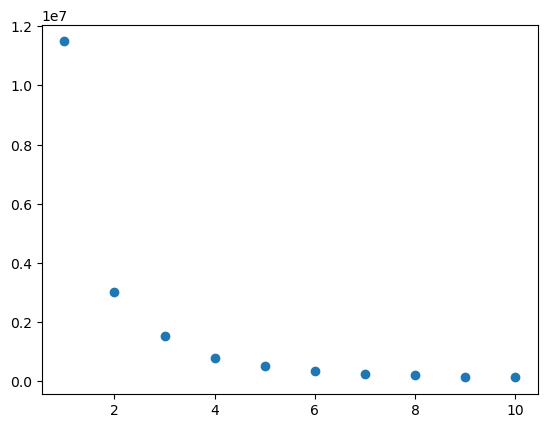

In [8]:
data = dataset[['Proline', 'Flavanoids']]

inertia = []
for i in range(1, 11):
   k_means = KMeans(n_clusters=i, init= 'k-means++', n_init=10)
   k_means.fit(data)
   inertia.append(k_means.inertia_)
plt.scatter(range(1, 11), inertia)

D:\Conda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Conda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Wonderful Semen\AppData\Local\Temp\ipykernel_8536\4267940910.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"] =  pd.Series(model.labels_)


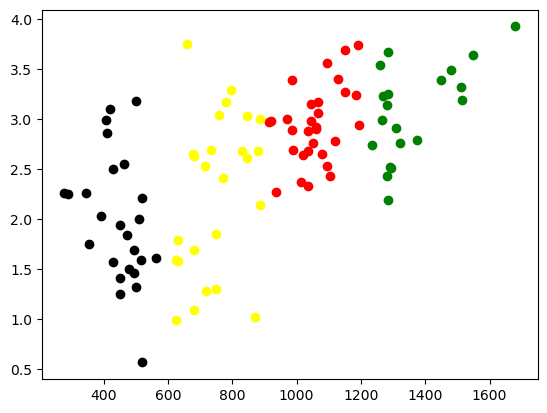

In [5]:
CLUSTERS = 4
model = KMeans(n_clusters=CLUSTERS)
model.fit(data)

clusters = pd.DataFrame(
    columns=data.columns,
    data=model.cluster_centers_
    )

data["Type"] =  pd.Series(model.labels_)

colors = ['green', 'yellow', 'red', 'black']

data_list = data.values.tolist()

for i in data_list:
    plt.scatter(i[0], i[1], c = colors[int(i[2])])